# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [7]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# Continous to Discrete
"""
Your Code Here
"""
bin_cut = np.linspace(10, 71, 11)#自 20 到 70 歲，切 11 個點 (得到 10 組)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = bin_cut) 

print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(34.4, 40.5]    51857
(40.5, 46.6]    48717
(28.3, 34.4]    47959
(52.7, 58.8]    42258
(46.6, 52.7]    41353
(58.8, 64.9]    34874
(22.2, 28.3]    30091
(64.9, 71.0]     8670
(16.1, 22.2]     1732
(10.0, 16.1]        0
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(22.2, 28.3]"
1,0,16765,45.931507,"(40.5, 46.6]"
2,0,19046,52.180822,"(46.6, 52.7]"
3,0,19005,52.068493,"(46.6, 52.7]"
4,0,19932,54.608219,"(52.7, 58.8]"


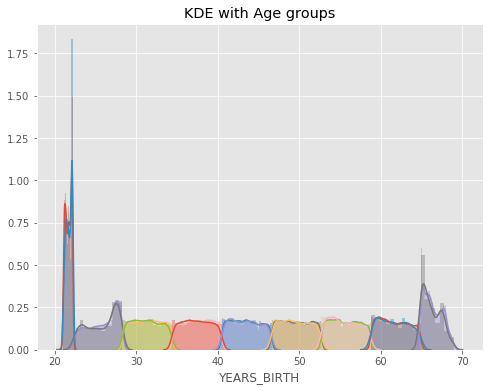

In [32]:
"""
Your Code Here
"""
year_group_sorted = np.unique(age_data['YEARS_BINNED'].values) 

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [33]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(10.0, 16.1]",NaN,NaN,NaN
"(16.1, 22.2]",0.128176,7908.151848,21.666169
"(22.2, 28.3]",0.115217,9416.837792,25.799556
"(28.3, 34.4]",0.105257,11441.238787,31.345860
"(34.4, 40.5]",0.089959,13695.734751,37.522561
"(40.5, 46.6]",0.077694,15860.752160,43.454116
"(46.6, 52.7]",0.071313,18107.799531,49.610410
"(52.7, 58.8]",0.058924,20317.693502,55.664914
"(58.8, 64.9]",0.053622,22515.138355,61.685311


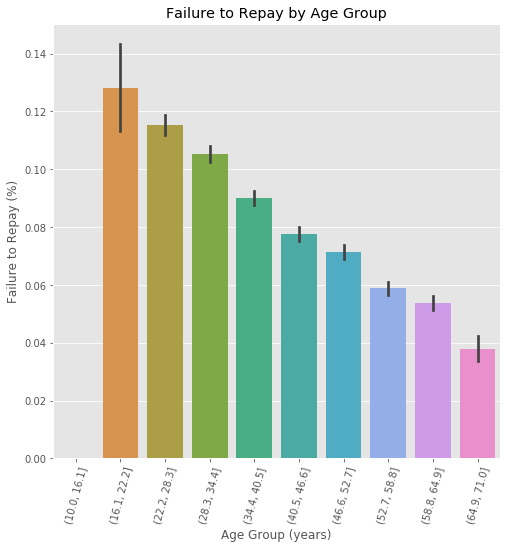

In [40]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = 'YEARS_BINNED'
py = 'TARGET'
sns.barplot(px, py, data=age_data)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');